In [1]:
import time
import numpy as np
import pandas as pd 
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, log_loss
from sklearn.metrics.pairwise import cosine_similarity
from gaminet.utils import local_visualize
from gaminet.utils import global_visualize_density
from gaminet.utils import feature_importance_visualize
from gaminet.utils import plot_trajectory
from gaminet.utils import plot_regularization
from sklearn.linear_model import LinearRegression
from collections import OrderedDict
import sys
sys.path.append('../../')
from lvxnn.LVXNN import LV_XNN
from lvxnn.DataReader import data_initialize
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

In [2]:
data= pd.read_csv('data/train_new.csv')
train, test = train_test_split(data, test_size = 0.2)


list1 = train.columns
meta_info = OrderedDict()
for i in list1:
    meta_info[i]={'type': 'categorical','source':'user'}
meta_info['income']={"type":"continues",'source':'user'}
meta_info['cust_seniority']={"type":"continues",'source':'user'}
meta_info['age'] = {"type":"continues",'source':'user'}
meta_info['item'] = {'type': 'categorical','source':'item'}
meta_info['user_id']={"type":"id",'source':'user'}
meta_info['item_id']={"type":"id",'source':'item'}
meta_info['target']={"type":"target",'source':''}


xx, Xi, y, tr_idx, xx_t, Xi_t, y_t, val_x, val_y, val_idx, meta_info, model_info = data_initialize(train,test,meta_info,"Classification")

Memory usage of dataframe is 108.45 MB


../..\lvxnn\DataReader.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype('category')
../..\lvxnn\DataReader.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.int8)
../..\lvxnn\DataReader.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].as

Memory usage after optimization is: 23.42 MB
Decreased by 78.4%
Memory usage of dataframe is 27.11 MB
Memory usage after optimization is: 5.86 MB
Decreased by 78.4%
cold start user: 0
cold start item: 0


In [3]:
model = LV_XNN(model_info=model_info, meta_info=meta_info, subnet_arch=[8, 16],interact_arch=[20, 10],activation_func=tf.tanh, batch_size=1000, lr_bp=0.01, auto_tune=False,
               interaction_epochs=20,main_effect_epochs=20,tuning_epochs=10,loss_threshold_main=0.01,loss_threshold_inter=0.01,alpha=0,combine_range=0.6549,
              verbose=True,val_ratio=0.125, early_stop_thres=100,interact_num=10,u_group_num=50,i_group_num=10,scale_ratio=0.84,n_power_iterations=5,n_oversamples=0,
              mf_training_iters=15,change_mode=True,convergence_threshold=0.001,max_rank=3,shrinkage_value=20, epsilon=0)

In [4]:
st_time = time.time()
model.fit(tr_x,tr_Xi, tr_y)
ed_time = time.time()

ListWrapper(['ind_empleado', 'sex', 'ind_nuevo', 'indrel', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext', 'indfall', 'ind_actividad_cliente', 'segmento', 'pais_residencia', 'canal_entrada', 'age', 'cust_seniority', 'income', 'marriage', 'item'])
####################GAMI-Net training start.####################
##########Stage 1: main effect training start.##########
Main effects training epoch: 1, train loss: 0.29787, val loss: 0.29451
Main effects training epoch: 2, train loss: 0.29815, val loss: 0.29517
Main effects training epoch: 3, train loss: 0.29689, val loss: 0.29377
Main effects training epoch: 4, train loss: 0.29698, val loss: 0.29378
Main effects training epoch: 5, train loss: 0.29671, val loss: 0.29346
Main effects training epoch: 6, train loss: 0.29736, val loss: 0.29405
Main effects training epoch: 7, train loss: 0.29670, val loss: 0.29352
Main effects training epoch: 8, train loss: 0.29752, val loss: 0.29420
Main effects training epoch: 9, train loss: 0.29674, val los

C:\Users\64161\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\64161\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[SoftImpute] Iter 1: observed BCE=0.094448 validation BCE=0.159253,rank=3


C:\Users\64161\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\64161\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[SoftImpute] Iter 2: observed BCE=0.092173 validation BCE=0.147403,rank=3


C:\Users\64161\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\64161\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[SoftImpute] Iter 3: observed BCE=0.091254 validation BCE=0.143826,rank=3
[SoftImpute] Iter 4: observed BCE=0.091832 validation BCE=0.143267,rank=3
[SoftImpute] Iter 5: observed BCE=0.091013 validation BCE=0.141629,rank=3
[SoftImpute] Iter 6: observed BCE=0.091407 validation BCE=0.141365,rank=3
[SoftImpute] Iter 7: observed BCE=0.090689 validation BCE=0.140602,rank=3
[SoftImpute] Iter 8: observed BCE=0.091151 validation BCE=0.140693,rank=3
[SoftImpute] Iter 9: observed BCE=0.090526 validation BCE=0.140105,rank=3
[SoftImpute] Iter 10: observed BCE=0.091055 validation BCE=0.140563,rank=3
[SoftImpute] Iter 11: observed BCE=0.090444 validation BCE=0.139898,rank=3
[SoftImpute] Iter 12: observed BCE=0.091017 validation BCE=0.140393,rank=3
[SoftImpute] Iter 13: observed BCE=0.090413 validation BCE=0.139892,rank=3
[SoftImpute] Iter 14: observed BCE=0.090977 validation BCE=0.140385,rank=3
[SoftImpute] Iter 15: observed BCE=0.090398 validation BCE=0.139882,rank=3
[SoftImpute] Stopped after itera

In [5]:
pred = model.predict(te_x, te_Xi)

In [6]:
# pred = model.predict(te_x, te_Xi)
auc = roc_auc_score(te_y,pred)
logloss = log_loss(te_y,pred)
print('lvxnn auc:',auc)
print('lvxnn logloss:',logloss)

lvxnn auc: 0.9819118487595079
lvxnn logloss: 0.15023064320252671


In [10]:
cold_pred

array([[0.02922547, 0.0374645 , 0.00140469, ..., 0.0021591 , 0.00355149,
        0.10683418]])

In [7]:
cold_y = te_y[(te_Xi[:,1] != 'cold') & (te_Xi[:,0] != 'cold')]
cold_pred = pred[(te_Xi[:,1] != 'cold') & (te_Xi[:,0] != 'cold')]
auc = roc_auc_score(cold_y,cold_pred)
logloss = log_loss(cold_y,cold_pred)
print('warm start:',auc,logloss)

C:\Users\64161\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.
C:\Users\64161\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


ValueError: unknown format is not supported

In [ ]:
cold_y = te_y[(te_Xi[:,1] == 'cold') | (te_Xi[:,0] == 'cold')]
cold_pred = pred[(te_Xi[:,1] == 'cold') | (te_Xi[:,0] == 'cold')]
auc = roc_auc_score(cold_y,cold_pred)
logloss = log_loss(cold_y,cold_pred)
print('cold start:',auc,logloss)

In [ ]:
pred_v = model.final_gam_model.predict(te_x)
auc = roc_auc_score(te_y,pred_v)
logloss = log_loss(te_y,pred_v)
print('gami auc:',auc)
print('gami logloss:',logloss)

In [10]:
model.final_mf_model.best_ratio

0.84

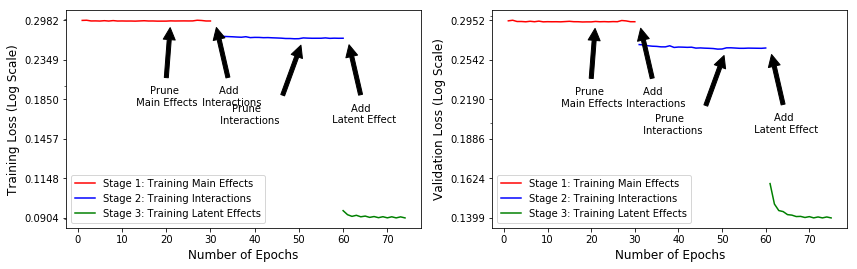

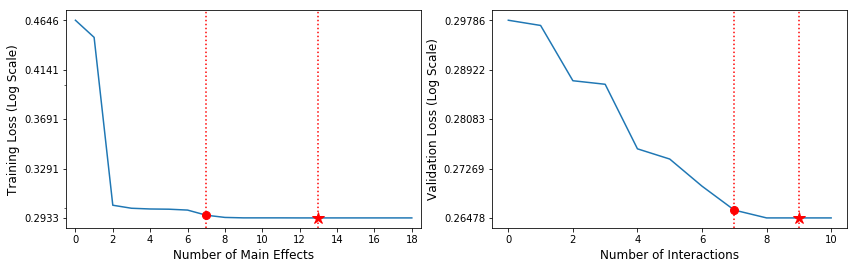

In [11]:
simu_dir = 'result'
data_dict_logs = model.final_gam_model.summary_logs(save_dict=False)
data_dict_logs.update({"err_train_mf":model.final_mf_model.mf_mae,
                       "err_val_mf":model.final_mf_model.mf_valmae})
plot_trajectory(data_dict_logs, folder=simu_dir, name="s1_traj_plot", log_scale=True, save_png=True, save_eps=False)
#plot_regularization(data_dict_logs, folder=simu_dir, name="s1_regu_plot", log_scale=True, save_png=True, save_eps=False)
plot_regularization(data_dict_logs, folder=simu_dir, name="s1_regu_plot", log_scale=True, save_png=True, save_eps=False)

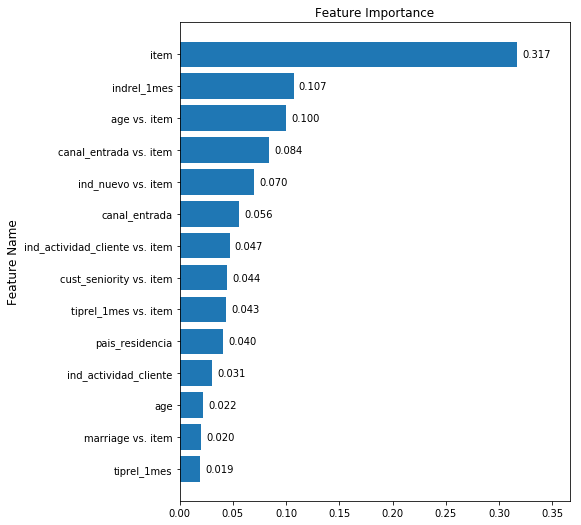

In [12]:
data_dict = model.final_gam_model.global_explain(0,save_dict=False)
feature_importance_visualize(data_dict, save_png=True, folder=simu_dir, name='s1_feature')

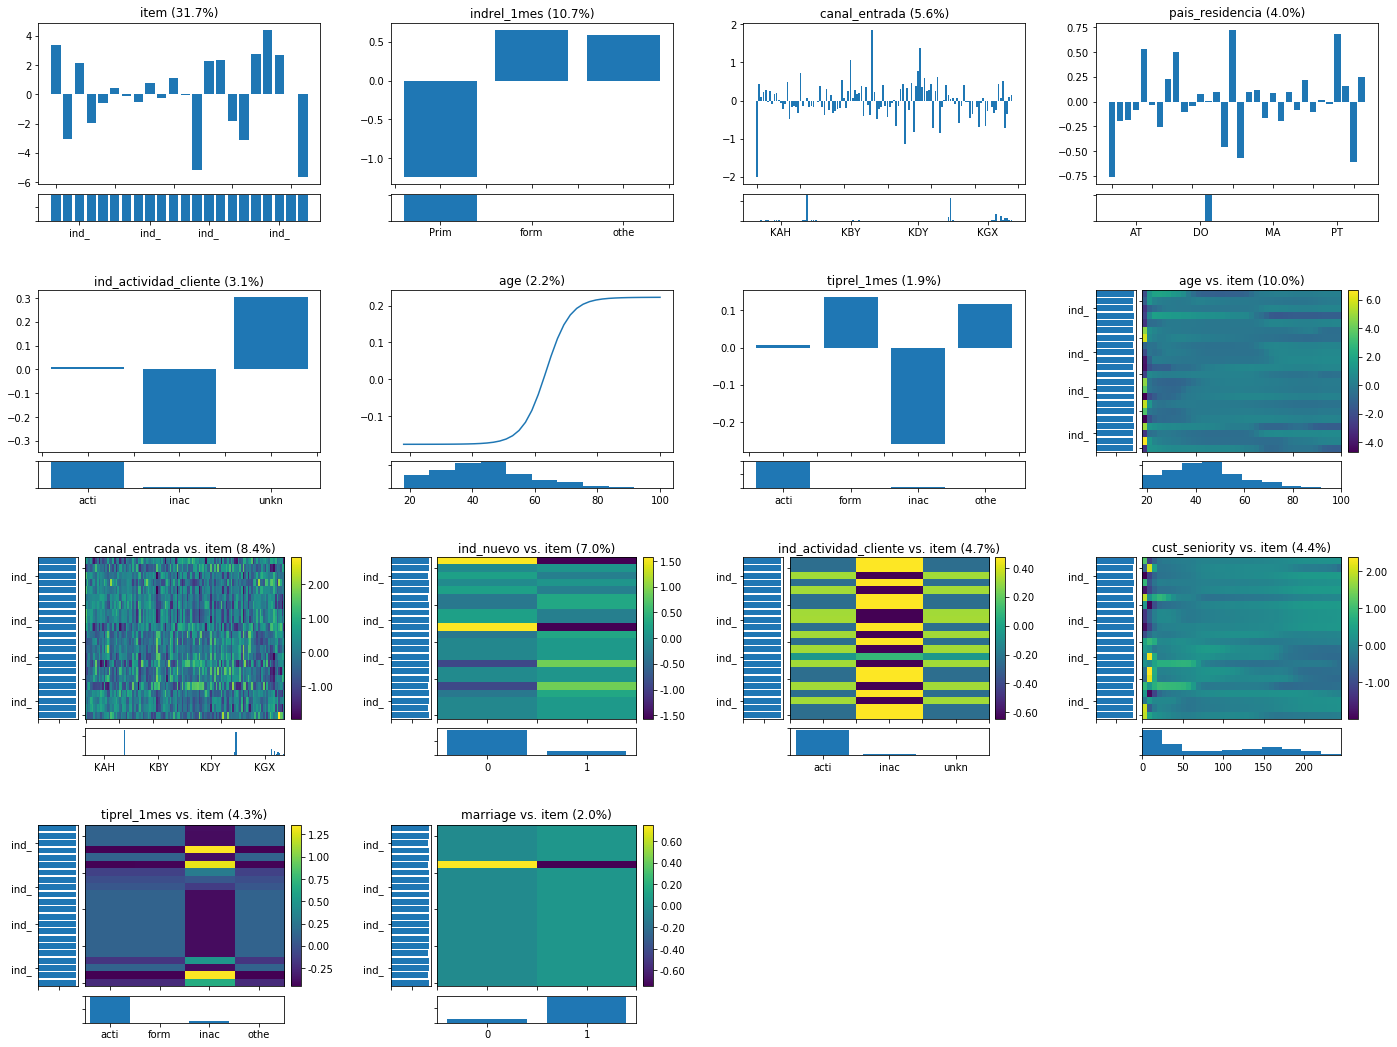

In [13]:
global_visualize_density(data_dict, save_png=True, folder=simu_dir, name='s1_global')

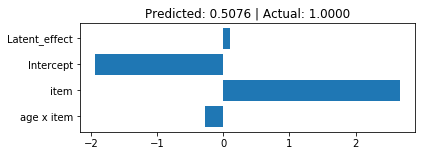

In [25]:
data_dict_local = model.local_explain(0,88,tr_x,tr_Xi,tr_y)
local_visualize(data_dict_local, save_png=True, folder=simu_dir, name='s1_local')

In [26]:
model.mf_distance(0.9,'user')

IndexError: index -2 is out of bounds for axis 0 with size 1

In [24]:
new = te_x[100,:17].reshape(1,-1)
_ = model.cold_start_analysis(new,'user',1.96)

The new user belong to group [0]
 mean is [ 1.06259535e-04 -9.39010463e-05 -5.58286548e-05] and std is [0.00532601 0.00522245 0.00556533]
 the confidence interval is [[-0.01033272 -0.0103299  -0.01096388],[0.01054524 0.0101421  0.01085222]]


## xgboost

In [6]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

train= pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train = train.drop(['item'],1)
test = test.drop(['item'],1)
data,val = train_test_split(train,test_size=0.125)

x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
x_t = test.iloc[:,:-1].values
y_t = test.iloc[:,-1].values

enc = MinMaxScaler()
x = enc.fit_transform(x)
x_t = enc.fit_transform(x_t)

xgb = XGBClassifier(n_jobs=-1)
xgb.fit(x,y)
pred = xgb.predict(x_t)
        
mae.append(mean_absolute_error(y_t,pred))
rmse.append(mean_squared_error(y_t,pred)**0.5)

i_result = np.array([np.mean(mae),np.mean(rmse)]).reshape(1,-1)
result = pd.DataFrame(i_result,columns=['mae','rmse'])
    
results.to_csv('result/xgboost_result.csv',index=None)

NameError: name 'mae' is not defined

In [12]:
pred = xgb.predict_proba(x_t)

In [31]:
pred.astype(int16)

NameError: name 'int16' is not defined

In [32]:
data= pd.read_csv('data/train_new.csv')
train, test = train_test_split(data, test_size = 0.2)

In [42]:
data.user_id.unique().shape

(36710,)

In [44]:
train[train['target']==1].user_id.unique().shape

(36022,)

In [45]:
test[test['target']==1].user_id.unique().shape

(19411,)

In [46]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from collections import OrderedDict


def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

def data_index(train_x):
    df = pd.DataFrame(train_x[:,-2:])
    feat_dict = {}
    ui_shape = []
    tc = 0
    for col in range(train_x[:,-2:].shape[1]):
        us = df[col].unique()
        ui_shape.append(us.shape[0])
        feat_dict[col] = dict(zip(us, range(tc, len(us)+tc)))
        tc += len(us)
        feat_dim = tc

    return feat_dict, feat_dim, ui_shape



def data_index_get(train_x, feat_dict):

    dfi = pd.DataFrame(train_x[:,-2:])
    for col in dfi.columns:
        dfi[col] = dfi[col].map(feat_dict[col])
    Xi = dfi.values.tolist()
    Xi = np.array(Xi)

    return Xi

def cold_index(train_x, test_x, feat_dict):
    train = pd.DataFrame(train_x[:,-2:])
    test = pd.DataFrame(test_x[:,-2:])
    cold_num = []
    for col in train.columns:
        num = 0
        tr = pd.DataFrame(train.iloc[:,col])
        te = pd.DataFrame(test.iloc[:,col])

        tr = tr.drop_duplicates()
        te = te.drop_duplicates()

        one = np.ones(tr.shape)
        tr = pd.concat([tr,pd.DataFrame(one,columns=['signal'])],1)
        re = pd.merge(te,tr,how='left')
        re = re[re.iloc[:,1].isna()]

        for i in re.iloc[:,0]:
            feat_dict[col][i]='cold'
            num += 1
        cold_num.append(num)
    print('cold start user:',cold_num[0])
    print('cold start item:',cold_num[1])
    
    return feat_dict
    

def load_meta_info(data,meta_info,task_type,path="./data/",  rand_seed=0):
    #data = pd.read_csv(path + "movie_lens/train.csv", header=1)

    x, y = data.iloc[:,:-1].values, data.iloc[:,[-1]].values
    xx = np.zeros(x.shape)
    for i, (key, item) in enumerate(meta_info.items()):
        if item['type'] == "target":
            if task_type == 'Regression':
                continue
            elif task_type == 'Classification':
                
                enc = OrdinalEncoder()
                enc.fit(y)
                y = enc.transform(y)
            #sx = MinMaxScaler((0, 1))
            #y = sx.fit_transform(y)
            
            #meta_info[key]["scaler"] = sx
            #meta_info[key]["values"] = enc.categories_[0].tolist()
        elif item['type'] == "categorical":
            enc = OrdinalEncoder()
            enc.fit(x[:,[i]])
            ordinal_feature = enc.transform(x[:,[i]])
            xx[:,[i]] = ordinal_feature
            meta_info[key]["values"] = enc.categories_[0].tolist()
        elif item['type'] == "id":
            xx[:,[i]] = x[:,[i]]
        else:
            sx = MinMaxScaler((0, 1))
            xx[:,[i]] = sx.fit_transform(x[:,[i]])
            meta_info[key]["scaler"] = sx

    #train_x, test_x, train_y, test_y = train_test_split(xx.astype(np.float32), y, test_size=test_ratio, random_state=rand_seed)
    #return train_x, test_x, train_y, test_y, task_type, meta_info
    return xx.astype(np.float32), y, meta_info

In [92]:
list1 = train.columns
meta_info = OrderedDict()
for i in list1:
    meta_info[i]={'type': 'categorical','source':'user'}
meta_info['income']={"type":"continues",'source':'user'}
meta_info['cust_seniority']={"type":"continues",'source':'user'}
meta_info['age'] = {"type":"continues",'source':'user'}
meta_info['item'] = {'type': 'categorical','source':'item'}
meta_info['user_id']={"type":"id",'source':'user'}
meta_info['item_id']={"type":"id",'source':'item'}
meta_info['target']={"type":"target",'source':''}


#tr_x, tr_Xi, tr_y , te_x , te_Xi, te_y, meta_info, model_info = data_initialize(train,test,meta_info,"Classification")

In [50]:
meta_info_o = meta_info

In [93]:
# data = reduce_mem_usage(data)
# test = reduce_mem_usage(test)
xx, y, meta_info = load_meta_info(train,meta_info_o,"Classification")
xx_t , y_t, meta_info_t = load_meta_info(test,meta_info_o,"Classification")
feat_dict, feat_dim, ui_shape= data_index(xx)
Xi = data_index_get(xx,feat_dict)
# feat_dict = cold_index(xx,xx_t,feat_dict)
# Xi_t = data_index_get(xx_t,feat_dict)

In [91]:
num=0
for (i,j) in feat_dict[0].items():
    if j=='cold':
        print(i)

165755.0
1248368.0
1133208.0
151960.0
1196655.0
396839.0
123050.0
1395017.0
1403548.0
782933.0
452730.0
450228.0
221859.0
399246.0
369240.0
1263060.0
798615.0
723701.0
171809.0
1399932.0
1392893.0
435338.0
1315485.0
1252582.0
564867.0
454778.0
396977.0
1246870.0
201395.0
874649.0
226620.0
1386915.0
1382608.0
77082.0
818833.0
1133243.0
1298365.0
1235246.0
53673.0
1384303.0
1398703.0
238317.0
654178.0
705563.0
534675.0
1007539.0
110783.0
1118367.0
918917.0
1385246.0
1401629.0
1399835.0
1107779.0
796600.0
671755.0
1087554.0
1400549.0
1327633.0
1201966.0
1387877.0
1080047.0
509789.0
762123.0
597967.0
893442.0
772835.0
1253341.0
55864.0
60003.0
88865.0
1164101.0
495832.0
890648.0
879472.0
343357.0
302994.0
1380262.0
1393940.0
720664.0
858432.0
210756.0
98941.0
864990.0
129027.0
64154.0
1202172.0
109808.0
786778.0
746612.0
1178382.0
1008113.0
1399969.0
1212330.0
120730.0
1399616.0
1027531.0
1250972.0
427215.0
263313.0
1103788.0
1163801.0
1241030.0
61212.0
819036.0
348611.0
860659.0
240454.0


511638.0
95181.0
431603.0
248526.0
680545.0
387540.0
462818.0
626150.0
1109106.0
1156463.0
1367406.0
316466.0
1402026.0
1393979.0
518942.0
173436.0
1254014.0
1189307.0
616298.0
391330.0
256276.0
70660.0
736044.0
1124066.0
796137.0
1156093.0
592174.0
1373149.0
1141427.0
1019870.0
317092.0
153754.0
124426.0
1267241.0
1193366.0
1157636.0
1237321.0
978687.0
1084903.0
787319.0
1369353.0
1369626.0
347143.0
1034181.0
489627.0
1385627.0
880824.0
1384788.0
1240724.0
113820.0
485347.0
683671.0
510289.0
1400131.0
513793.0
20776.0
911648.0
1399222.0
689585.0
441913.0
652421.0
977017.0
417027.0
455885.0
1261215.0
354682.0
72659.0
1367600.0
159666.0
1204612.0
1112652.0
1064083.0
251249.0
559374.0
1120656.0
932984.0
1033477.0
1374289.0
507739.0
1020279.0
1114380.0
190393.0
256406.0
1339056.0
53782.0
69572.0
1173818.0
1388210.0
76351.0
384865.0
226772.0
1401617.0
1375970.0
974255.0
496591.0
1009855.0
879343.0
1391118.0
1391417.0
1401654.0
212745.0
441773.0
1395545.0
399990.0
469135.0
371660.0
585746.0

1398175.0
1140733.0
315585.0
1253012.0
485713.0
124329.0
1369669.0
1378138.0
19777.0
595429.0
1119860.0
404743.0
1173673.0
134959.0
934937.0
1402146.0
1013211.0
465930.0
1395725.0
1267471.0
1111636.0
417460.0
612802.0
474394.0
477423.0
955859.0
1298743.0
1296624.0
968875.0
1356118.0
578756.0
1173326.0
31779.0
1015684.0
892217.0
1307141.0
1397424.0
248844.0
47109.0
1028689.0
493567.0
423297.0
71249.0
1240285.0
1400713.0
249811.0
445995.0
451998.0
399279.0
58636.0
1301617.0
1357945.0
45207.0
1396783.0
62729.0
190703.0
1402396.0
1181236.0
494290.0
463239.0
944669.0
1123623.0
478333.0
1176938.0
1177495.0
1394012.0
552339.0
1105218.0
62779.0
555345.0
363173.0
213153.0
1047635.0
53680.0
497599.0
856425.0
234562.0
336862.0
150406.0
1370966.0
1399604.0
426786.0
498620.0
1231708.0
198655.0
1399965.0
871783.0
1139981.0
1146264.0
24319.0
327445.0
1183353.0
70102.0
25406.0
1311814.0
1302525.0
491238.0
760946.0
918691.0
1021802.0
1162789.0
121497.0
718892.0
269558.0
536407.0
1232226.0
1400719.0
233

626501.0
82704.0
955222.0
895101.0
477371.0
257329.0
255122.0
904008.0
361337.0
133772.0
248210.0
400823.0
62848.0
350553.0
1211595.0
631116.0
1247024.0
1214677.0
1380482.0
1233618.0
1124651.0
846240.0
1273657.0
109520.0
49045.0
215675.0
1237291.0
106407.0
913745.0
580160.0
1402092.0
140408.0
23217.0
442474.0
486680.0
767788.0
49657.0
896673.0
615518.0
1080865.0
1379396.0
1309165.0
154003.0
848799.0
1024108.0
80300.0
604381.0
654489.0
390468.0
106712.0
28509.0
41900.0
1392603.0
1121816.0
1399526.0
1368158.0
669407.0
74049.0
1223338.0
1075436.0
114411.0
1394236.0
1278532.0
1402439.0
573698.0
152196.0
486367.0
1373791.0
53967.0
1400289.0
580877.0
564029.0
530847.0
74816.0
909193.0
856701.0
1398797.0
416582.0
1227352.0
549963.0
1401277.0
1162295.0
1206540.0
302127.0
900325.0
1399409.0
1402976.0
1236291.0
1221588.0
1372227.0
526897.0
215894.0
1062420.0
1325053.0
1402618.0
453924.0
411877.0
831283.0
1400039.0
1401740.0
1388772.0
1398620.0
1047567.0
408520.0
298067.0
223162.0
1395937.0
22429

219239.0
826321.0
1201552.0
798150.0
124990.0
760298.0
175620.0
641836.0
580525.0
391321.0
82071.0
266731.0
107248.0
1402621.0
1256033.0
1043404.0
794244.0
540647.0
1087239.0
1249493.0
1018733.0
1400731.0
39284.0
626015.0
909485.0
1401503.0
118680.0
494898.0
358841.0
1230910.0
1029493.0
1015801.0
132830.0
530893.0
1266264.0
1327246.0
285238.0
1198749.0
508102.0
552283.0
1240801.0
22019.0
262863.0
1298500.0
289198.0
1217313.0
1307085.0
1272218.0
448469.0
772988.0
267562.0
1098667.0
1388314.0
1398556.0
1247949.0
281188.0
1001822.0
119968.0
131355.0
150013.0
314843.0
145299.0
1292273.0
158038.0
1134861.0
311523.0
175086.0
857872.0
1126547.0
1377998.0
148757.0
331942.0
1342903.0
1060639.0
536602.0
55192.0
337943.0
1299709.0
1243027.0
1224349.0
118962.0
1399374.0
1135712.0
272094.0
1167909.0
973181.0
680014.0
671066.0
491809.0
319340.0
296807.0
1296847.0
303651.0
362059.0
394050.0
683899.0
1403934.0
495521.0
19183.0
696234.0
784424.0
1056089.0
503062.0
1113051.0
1360756.0
17950.0
690475.0
8

660459.0
322436.0
1250323.0
872093.0
1131652.0
189646.0
21698.0
769892.0
164814.0
1061466.0
1214101.0
549782.0
1403254.0
852229.0
1394284.0
654094.0
610589.0
1171217.0
1254502.0
515225.0
1400623.0
442754.0
1390808.0
21090.0
631080.0
1385170.0
200242.0
89000.0
1398145.0
220757.0
262871.0
403470.0
1077226.0
1242971.0
766188.0
1238940.0
437952.0
1085476.0
1156651.0
178081.0
716703.0
1244696.0
677684.0
1313450.0
1247743.0
1222549.0
624332.0
24216.0
1316567.0
256563.0
278814.0
1387410.0
1371171.0
1285075.0
548836.0
956623.0
1385200.0
155069.0
380540.0
1351657.0
1399782.0
1383364.0
1396257.0
242353.0
702161.0
565443.0
205164.0
1353467.0
1400308.0
145612.0
603526.0
958168.0
858151.0
198776.0
252729.0
1003150.0
920863.0
1114514.0
1377141.0
1400007.0
1052109.0
1397828.0
238265.0
1135450.0
152254.0
622138.0
1093405.0
1016901.0
1396101.0
268399.0
1267778.0
343599.0
1089029.0
456957.0
551897.0
687545.0
857745.0
1237757.0
609018.0
1103235.0
437773.0
1137115.0
1103294.0
1402916.0
499747.0
533859.0
1

1245359.0
1267358.0
840966.0
237757.0
653644.0
1045781.0
1117452.0
1138202.0
1303023.0
939951.0
1116584.0
749938.0
1014831.0
1399335.0
885845.0
260762.0
1031215.0
1055653.0
521970.0
1302029.0
1005161.0
343166.0
341825.0
1403022.0
318297.0
247882.0
1401712.0
1017213.0
1021906.0
596237.0
1237532.0
307446.0
91334.0
682379.0
893966.0
438931.0
915692.0
97412.0
1381974.0
893953.0
587493.0
307673.0
1306104.0
868066.0
1012502.0
60892.0
525087.0
1035987.0
1373396.0
849343.0
298092.0
800358.0
1344171.0
106762.0
451030.0
719059.0
1004180.0
834371.0
1171704.0
327746.0
1069691.0
720163.0
1088324.0
903924.0
799151.0
1379194.0
466948.0
1389871.0
1400746.0
498603.0
1402635.0
500365.0
449354.0
509469.0
765985.0
61499.0
1341580.0
101491.0
596520.0
895490.0
1387116.0
684295.0
1318504.0
1010820.0
240701.0
657650.0
1221060.0
204917.0
1239356.0
1243546.0
1306004.0
646672.0
48002.0
723082.0
965140.0
1013612.0
264505.0
1399747.0
650243.0
1397275.0
1300793.0
379481.0
739857.0
272382.0
1268769.0
1162268.0
11851

In [76]:
len(feat_dict[0])

36710

In [95]:
train_x = xx
test_x = xx_t


In [129]:
train = pd.DataFrame(train_x[:,-2:])
test = pd.DataFrame(test_x[:,-2:])
cold_num = []
for col in train.columns:
    num = 0
    tr = pd.DataFrame(train.iloc[:,col])
    te = pd.DataFrame(test.iloc[:,col])

    tr = tr.drop_duplicates()
    te = te.drop_duplicates()

    one = np.ones(tr.shape)
    tr = pd.concat([tr.reset_index(drop=True),pd.DataFrame(one,columns=['signal'])],1)
    re = pd.merge(pd.DataFrame(te),tr,how='left')
    re = re[re.iloc[:,1].isna()]

    for i in re.iloc[:,0]:
        feat_dict[col][i]='cold'
        num += 1
    cold_num.append(num)
print('cold start user:',cold_num[0])
print('cold start item:',cold_num[1])

cold start user: 0
cold start item: 0


In [105]:
tr = train.iloc[:,0].drop_duplicates()

In [109]:
te = test.iloc[:,0].drop_duplicates()

In [110]:
one = np.ones(tr.shape)

In [112]:
tr.shape

(36710,)

In [113]:
one.shape

(36710,)

In [119]:
tr= pd.concat([tr.reset_index(drop=True),pd.DataFrame(one,columns=['signal'])],1)

In [7]:
data.user_id.unique().shape

(36710,)

In [125]:
re = pd.merge(pd.DataFrame(te),tr,how='left')

In [11]:
data.age

0         0.1220
1         0.1220
2         0.1220
3         0.1220
4         0.1220
5         0.1220
6         0.1220
7         0.1220
8         0.1220
9         0.1220
10        0.1220
11        0.1220
12        0.1220
13        0.1220
14        0.1220
15        0.1220
16        0.1220
17        0.1220
18        0.1220
19        0.1220
20        0.1220
21        0.1220
22        0.2317
23        0.2317
24        0.2317
25        0.2317
26        0.2317
27        0.2317
28        0.2317
29        0.2317
           ...  
807590    0.4390
807591    0.4390
807592    0.4390
807593    0.4390
807594    0.4390
807595    0.4390
807596    0.4390
807597    0.4390
807598    0.3415
807599    0.3415
807600    0.3415
807601    0.3415
807602    0.3415
807603    0.3415
807604    0.3415
807605    0.3415
807606    0.3415
807607    0.3415
807608    0.3415
807609    0.3415
807610    0.3415
807611    0.3415
807612    0.3415
807613    0.3415
807614    0.3415
807615    0.3415
807616    0.3415
807617    0.34